<a href="https://colab.research.google.com/github/MxD-lab/SNN_Simulation/blob/xor/prexor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
# -*- coding: utf-8 -*-
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import numpy 

In [18]:
#時間（m秒）
msec = 10000
#サンプリングした時の時間軸
t = np.arange(0.0, msec)


In [19]:
def relu(x,n,a):
  """
  ReLU関数
  x:入力,
  n:x切片,
  a:傾き

  """
  y = a*(x-n)
  out = np.maximum(y,0)
  
  return out


In [20]:
def AND(x1,x2):
  # ゼロ初期化
  out=np.zeros(10000, dtype=float)

  # 重み/バイアス パラメータ
  w_1= 0.5
  w_2= 0.5
  b = -0.7

  # 要素数チェック
  if len(x1) != len(x2):
    raise Exception("x1 and x2 len does not match!")

  # 各フレームのノード出力値計算
  for i in range(len(x1)):
    out[i] = x1[i]*w_1 + x2[i]*w_2 + b

    if out[i] <0:
      out[i]= 0

    
  return out


In [21]:
def OR(x1,x2):
  # ゼロ初期化
  out=np.zeros(10000, dtype=float)

  # 重み/バイアス パラメータ
  w_1= 0.5
  w_2= 0.5
  b = -0.2

  # 要素数チェック
  if len(x1) != len(x2):
    raise Exception("x1 and x2 len does not match!")

  # 各フレームのノード出力値計算
  for i in range(len(x1)):
    out[i] = x1[i]*w_1 + x2[i]*w_2 + b

    if out[i] <0:
      out[i]= 0


  return out




In [22]:
def NAND(x1,x2):
  # ゼロ初期化
  out=np.zeros(10000, dtype=float)

  # 重み/バイアス パラメータ
  w_1= -0.5
  w_2= -0.5
  b = 0.7

  # 要素数チェック
  if len(x1) != len(x2):
    raise Exception("x1 and x2 len does not match!")

  # 各フレームのノード出力値計算
  for i in range(len(x1)):
    out[i] = x1[i]*w_1 + x2[i]*w_2 + b

    if out[i] <0:
      out[i]= 0
 

  return out


In [23]:
def XOR(x1,x2):
  
  s1 = NAND(x1,x2)
  s2 = OR(x1,x2)
  out = AND(s1,s2)

 # 各フレームのノード出力値計算
  for i in range(len(x1)):

    if out[i] <0:
     out[i]= 0

  return out

In [24]:
# シミュレーション用の波形準備
simulation_time = 10000
a_dens_array = [5000 if (i > 2500 and i < 5000) or (i > 7500 and i < 10000) else 0 for i in range(10000)]
b_dens_array = [5000 if (i > 5000 and i < 10000) else 0 for i in range(10000)]

# density情報からパルス数を生成
dt=0.000000001
a_pulse_cnt = numpy.multiply(a_dens_array , dt)
b_pulse_cnt =  numpy.multiply(b_dens_array , dt)

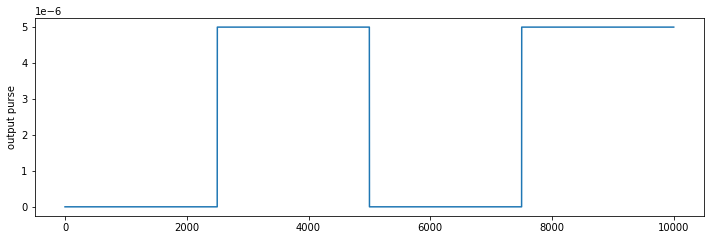

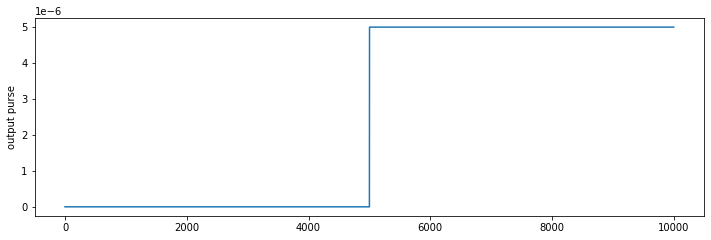

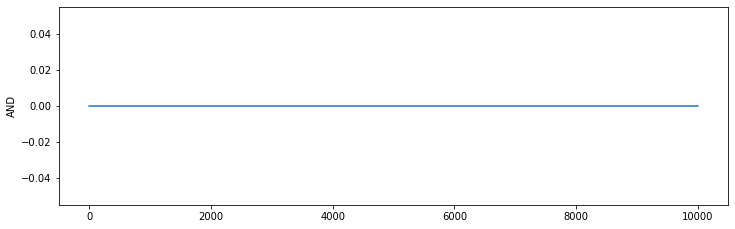

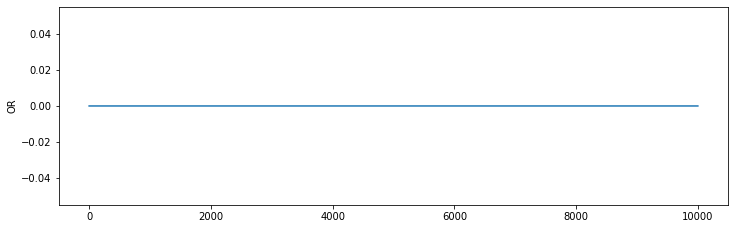

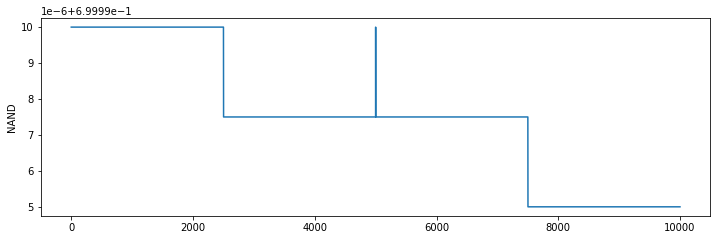

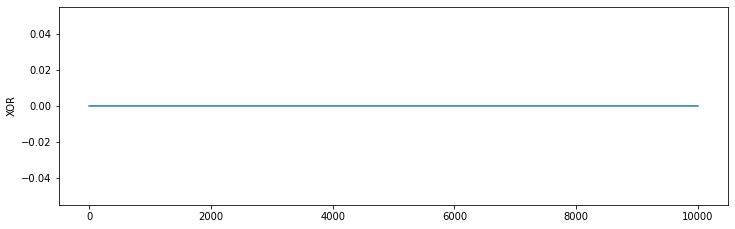

In [25]:
and_result = AND(a_pulse_cnt, b_pulse_cnt)
nand_result = NAND(a_pulse_cnt, b_pulse_cnt)
or_result = OR(a_pulse_cnt, b_pulse_cnt)
xor_result = XOR(a_pulse_cnt, b_pulse_cnt)

# 結果描画
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.ylabel('output purse')
plt.plot(a_pulse_cnt)
plt.show()

plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.ylabel('output purse')
plt.plot(b_pulse_cnt)
plt.show()

plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.ylabel('AND')
plt.plot(and_result)
plt.show()

plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.ylabel('OR')
plt.plot(or_result)
plt.show()

plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.ylabel('NAND')
plt.plot(nand_result)
plt.show()

plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.ylabel('XOR')
plt.plot(xor_result)
plt.show()